Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = "NONE"

# Simple neural network: A perceptron
Based on https://www.youtube.com/watch?v=kft1AJ9WVDk

This is what we want to train our neural network with:

![Alt Text](https://github.com/iluvatar1/2023-II-HerrComp/blob/master/04-LinearAlgebra/fig/neuralnetwork/inputs.png?raw=1)

And we want to predict the new output (try to guess the rule)

![Alt Text](https://github.com/iluvatar1/2023-II-HerrComp/blob/master/04-LinearAlgebra/fig/neuralnetwork/newoutput.png?raw=1)

This is the neural network that we are going to use (you can also use http://alexlenail.me/NN-SVG/index.html)


In [ ]:
from nnv import NNV

layersList = [
    {"title":"input", "units": 3, "color": "darkBlue"},
    {"title":"hidden 1\n(sigmoid)", "units": 1, "edges_color":"red", "edges_width":2},
    {"title":"output\n(sigmoid)", "units": 1,"color": "darkBlue"},
]

NNV(layersList).render()

To understand better the training, let's show explicitly the weights
![weightds](https://github.com/iluvatar1/2023-II-HerrComp/blob/master/04-LinearAlgebra/fig/neuralnetwork/weights.png?raw=1)


Here $\phi$ is called the activation function, and there are several proposals to it. We will use a sigmoid function
$$
f(x) = \dfrac{1}{1+\exp(-x)},
$$
where $x = \sum x_i w_i$.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_context('poster')
sns.set_style("whitegrid")

def sigmoid(x) :
    return 1.0/(1 + np.exp(-x))

xdata = np.linspace(-6.0, 6.0, 100)
plt.plot(xdata, sigmoid(xdata))
# Highlight x=0 and y=0 axes
plt.axhline(0, color='black', linestyle='--', linewidth=2.5)  # Horizontal line at y=0
plt.axvline(0, color='black', linestyle='--', linewidth=2.5)  # Vertical line at x=0
# Add labels to the x-axis and y-axis
plt.xlabel("x")
plt.ylabel(rf"sigmoid(x)")


# Basic Implementation
For this very basic nn, we will:
- set the input or start of the algorithm:
    + Random weights $w_i$
    + Set the training inputs and outputs
- Create an iteration function to perform the training for `nsteps` (initially 1)

The we just iterate once and check what happens

In [23]:
import numpy as np

def sigmoid(x) :
    return 1.0/(1 + np.exp(-x))

def get_training_inputs():
    return np.array([[0, 0, 1],
                     [1, 1, 1]
                     #[1, 0, 1],
                     #[0, 1, 1]
                     ])

def get_training_outputs():
    return np.array([0, 1]).reshape(2, 1)

def get_init_weights():
    """
    Initially, simply return random weights in [-1, 1)
    """
    return np.random.uniform(-1.0, 1.0, size=(3, 1))

def training_one_step(training_inputs, training_outputs, initial_weights):
    # iter only once
    input_layer = training_inputs
    outputs = sigmoid(np.dot(input_layer, initial_weights))
    return outputs

In [24]:
np.random.seed(1) # what happens if you comment this?
inputs_t = get_training_inputs()
outputs_t = get_training_outputs()
weights = get_init_weights()

In [25]:
outputs = training_one_step(inputs_t, outputs_t, weights)
print("Training outputs:")
print(outputs_t)
print("Results after one step training:")
print(outputs)

Training outputs:
[[0]
 [1]]
Results after one step training:
[[0.2689864]
 [0.3262757]]


# Improving the training
These results are not optimal, and depend a lot on the initial weights. Also, we are not yet comparing with the expecting output for the training data. We are now going to include it and add correction terms to the weights, so we will be using back-propagation. Our algorithm is now:
- Take each input from the training data.
- Compute the error, i.e. the difference between the output and the expected one, `output - expectedoutput`.
- According to the error, adjust the weights
- Repeat this many times, hopefully getting convergence , and also being able to apply our nn to new cases not used already.

But how to adjust the weights? There are several techniques based on the actual error $\Delta$. Here we will use error weighted derivative. Given the form of the sigmoid function, this increases the adjust if the derivative is larger, and viceversa. It can be expressed as

$$
\Delta w = \Delta \times \text{input} \times \phi'(output),
$$
where $\phi'$ is the derivative of the activation function. In our one-dimensional case we can compute it easily, but with more complex problems it becomes a gradient and its efficient computation is very important (remember automatic differentiation?)

In [26]:
def sigmoid_prime(x):
    return x*(1-x)

def train_nn(training_inputs, training_outputs, initial_weights, niter, errors_data):
    w = initial_weights
    for ii in range(niter):
        # Forward propagation
        input_layer = training_inputs
        outputs = sigmoid(np.dot(input_layer, w))
        # Backward propagation
        errors = training_outputs - outputs
        deltaw = errors*sigmoid_prime(outputs)
        deltaw = np.dot(input_layer.T, deltaw)
        w += deltaw
        # Save errors for plotting later
        errors_data[ii] = errors.reshape((3,))
    return outputs, w

In [27]:
np.random.seed(1) # what happens if you comment this?
inputs_t = get_training_inputs()
outputs_t = get_training_outputs()
weights = get_init_weights()

In [28]:
NITER = 5000
errors = np.zeros((NITER, 2))
outputs, weights = train_nn(inputs_t, outputs_t, weights, NITER, errors)
print("Training outputs:")
print(outputs_t)
print("Results after training:")
print(outputs)

ValueError: ignored

Text(0.5, 0, 'Epoch')

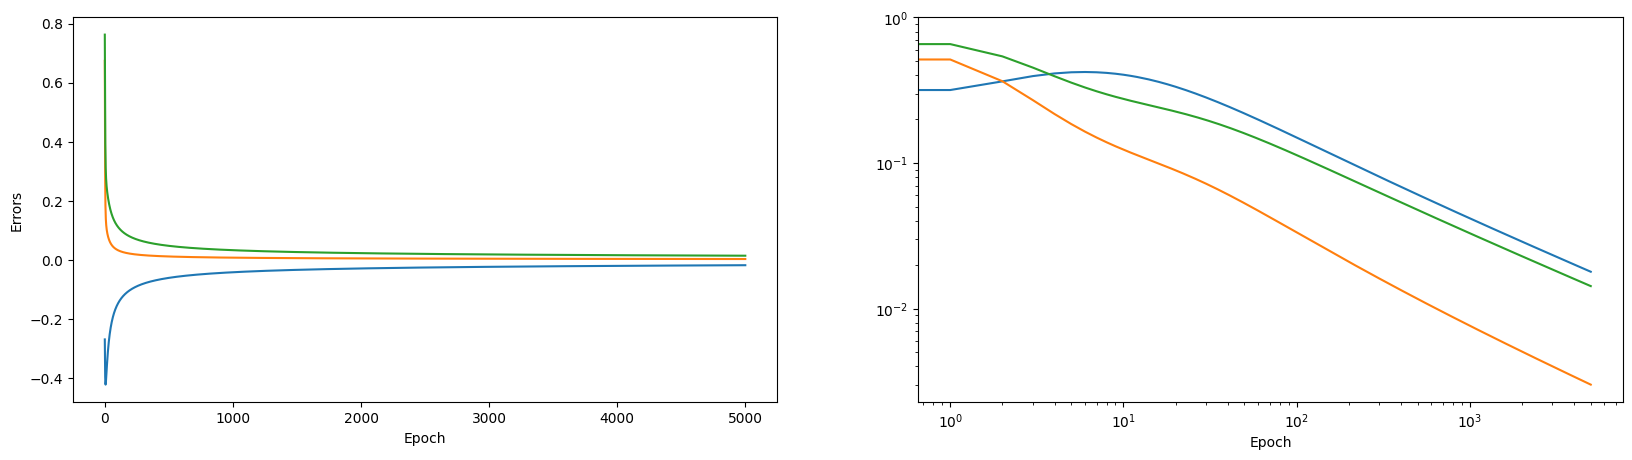

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].plot(range(NITER), errors)
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Errors")
ax[1].loglog(range(NITER), np.abs(errors))
ax[1].set_xlabel("Epoch")

It seems that our network is very well trained, But how does it perform with a new input? let's check with `[1, 0, 0]`


In [12]:
#print(weights)
#print(weights.shape)
input_new = np.array([1, 0, 0]).reshape(3, 1)
#print(input_new)
#print(input_new.shape)
#print(np.sum(weights*input_new))
print(sigmoid(np.sum(weights*input_new)))

0.9997365814649553


Which is basically one, as expected.
There are more topics related to this that we have not used, like more layers, more neurons per hidden layer, bias on the activation function, and a lot of other details, but hopefully you now see how a neural network works on the core.

Recommended lectures:
- 3blue1brown Neural Networks: https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi
- Neiral networks from scratch: https://www.youtube.com/watch?v=9RN2Wr8xvro

TODO:
- Add a second layer and compare the convergence
- Add an example using pythorch/tensorflow